In [1]:
import myLib
import numpy as np
from matplotlib import pyplot as plt

In [2]:
Data = myLib.file_opener("Fit.txt")
Data
X = []
Y = []
for i in range(len(Data)):
    X.append(Data[i][0])
    Y.append(Data[i][1])
print(X,Y)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0] [0.486, 0.866, 0.944, 1.144, 1.103, 1.202, 1.166, 1.191, 1.124, 1.095, 1.122, 1.102, 1.099, 1.017, 1.111, 1.117, 1.152, 1.265, 1.38, 1.575, 1.857]


In [3]:
def cheby(i,X):
        if(i == 0): return 1
        if(i == 1): return (2*X)-1
        if(i == 2): return (8*X*X)-(8*X)+1
        if(i == 3): return (32*X*X*X)-(48*X*X)+(18*X)-1

C1,cov1,cond1 =  myLib.PolynomialChiSqFit(X, Y, n=4)
C2,cov2,cond2 =  myLib.ChebyPolynomialChiSqFit(X, Y, n=4)

yfit1 = []
for i in range(len(X)):
    yfit1.append(C1[0]+C1[1]*X[i]+C1[2]*X[i]*X[i]+C1[3]*X[i]*X[i]*X[i])

yfit2 = []
for i in range(len(X)):
    #yfit2.append(C2[0]+C2[1]*cheby(1,X[i])+C2[2]*X[i]*X[i]+C2[3]*X[i]*X[i]*X[i])
    sum = 0
    for j in range(4):
        sum += C2[j]*cheby(j,X[i])
    yfit2.append(sum)

[  0.59832404   4.44384475 -10.45497108   7.23951536] 12104.948671030921
[1.16093319 0.39343956 0.04683042 0.2396269 ] 3.856146578615577
So, chebyschev fitting is more tolerant to any changes in the input data.


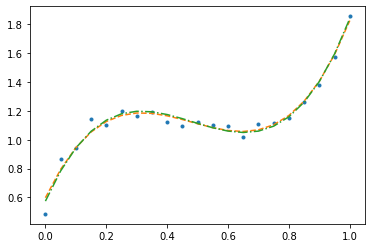

In [4]:
plt.plot(X,Y,'.')
plt.plot(X,yfit1,'--')
plt.plot(X,yfit2,'-.')
print(C1,cond1)
print(C2,cond2)
print("So, chebyschev fitting is more tolerant to any changes in the input data.")